Importing the data from Kaggle

In [1]:
!pip install q kaggle

ERROR: Could not install packages due to an EnvironmentError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/a4/62/02da182e544a51a5c3ccf4b03ab79df279f9c60c5e82d5e8bec7ca26ac11/python_slugify-8.0.4-py2.py3-none-any.whl (Caused by ConnectTimeoutError(<pip._vendor.urllib3.connection.HTTPSConnection object at 0x0000022E30E9E9A0>, 'Connection to files.pythonhosted.org timed out. (connect timeout=15)'))



In [4]:
# Importing the necessary libraries
from google.colab import files
from google.colab import autoviz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'google'

In [ ]:
# Upload the kaggle json file
files.upload()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
# Copy Kaggle credentials to created folder
!cp kaggle.json ~/.kaggle/

In [5]:
# Change the permission of the Kaggle API credentials
!chmod 600 ~/.kaggle/kaggle.json

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# Download the dataset
!kaggle datasets download -d blastchar/telco-customer-churn

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!unzip /content/telco-customer-churn.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


Loading and Visualization Dataset

Exploratory Data Analysis

In [8]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

NameError: name 'pd' is not defined

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].nunique()

In [ ]:
unique_values_per_column

{'gender': 2,
 'SeniorCitizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'tenure': 73,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'MonthlyCharges': 1585,
 'TotalCharges': 6531,
 'Churn': 2}

We do not need customer ID in our analysis as it does not help us predict whether the cutomer will churn or not also, it increases the dimensionality.

We do not need to worry about the null values

In [ ]:
df.drop(["customerID"], inplace = True, axis = 1)

In [ ]:
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["black", "red"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

    # Annotate bars with percentage values
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

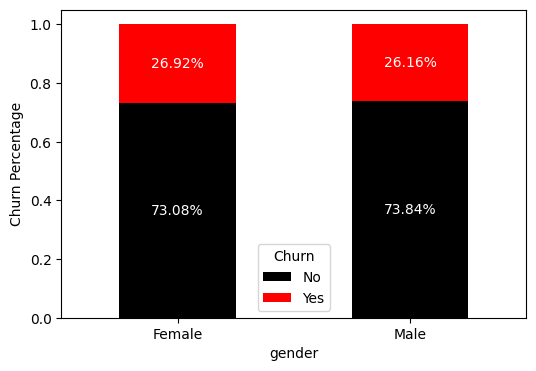

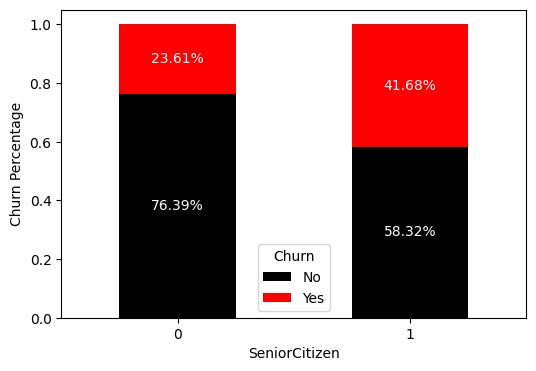

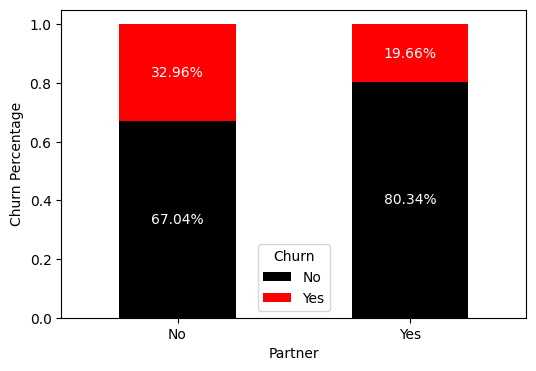

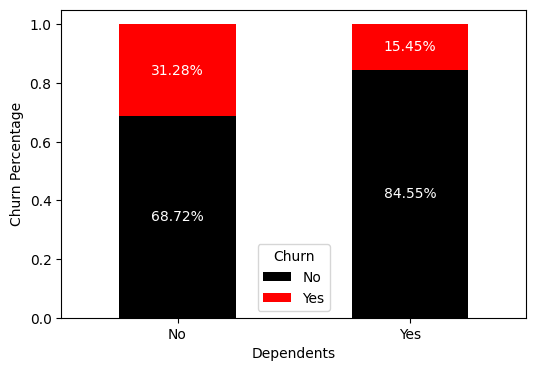

In [ ]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")



From above plots, we can say following:

*   Gender alone does not help us predict the customer churn.
*   If a person is young and has a family, he or she is less likely to stop the service as we can see below. The reason might be the busy life, more money or another factors.

In [ ]:
# To visualize about the above findings
def Plot(data, label):
  # Plotting
  plt.figure(figsize=(6, 4))
  ax = data.plot(kind='bar', color=['green', 'red'])
  plt.title(f'Churn Value Counts for {label}')
  plt.xlabel('Churn')
  plt.ylabel('Count')
  plt.xticks(rotation=0)

  # Adding annotations
  # for p in ax.patches:
    # width, height = p.get_width(), p.get_height()
    # x, y = p.get_xy()
    # ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')
  # for i, count in enumerate(data):
  #     plt.text(i, count, str(count), ha='center', va='center')

  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

  plt.show()

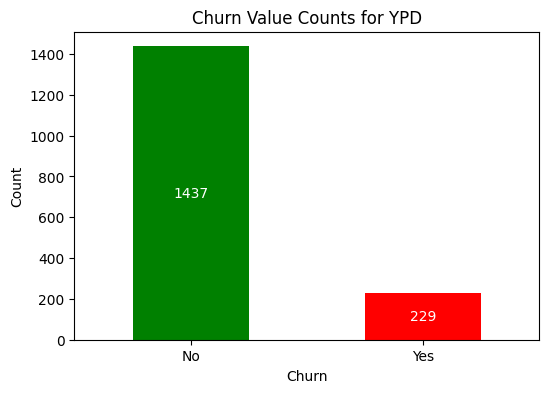

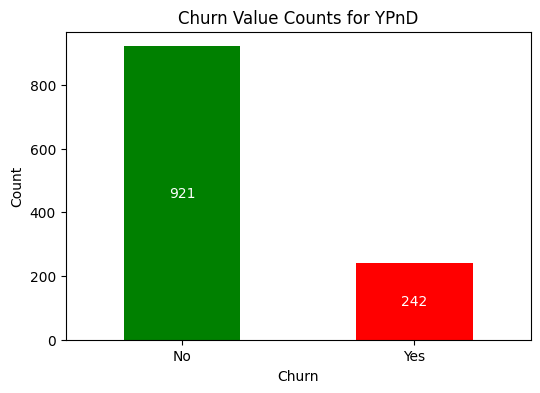

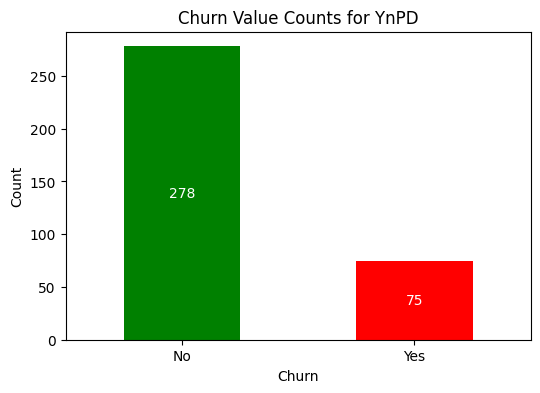

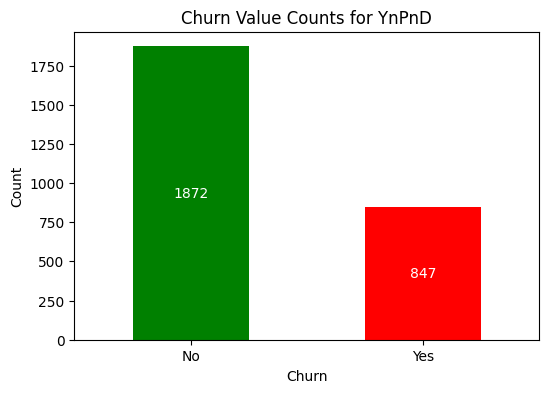

In [ ]:
# From the above we are deep diving into the categories of the deductions made above
"""
Y - is Young
P - has Partner
D - has Dependent
"""
YPD = df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'Yes')].Churn.value_counts()
Plot(YPD, "YPD")
YPnD = df[(df.SeniorCitizen == 0) & (df.Partner == 'Yes') & (df.Dependents == 'No')].Churn.value_counts()
Plot(YPnD, "YPnD")
YnPD = df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'Yes')].Churn.value_counts()
Plot(YnPD, "YnPD")
YnPnD = df[(df.SeniorCitizen == 0) & (df.Partner == 'No') & (df.Dependents == 'No')].Churn.value_counts()
Plot(YnPnD, "YnPnD")

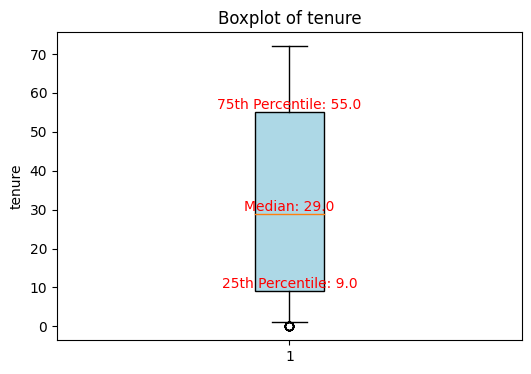

In [ ]:
plt.figure(figsize=(6, 4))
quantiles = np.percentile(df['tenure'], [25, 50, 75])
median = np.median(df['tenure'])

plt.boxplot(df['tenure'],patch_artist=True, boxprops=dict(facecolor='lightblue'),whis=[5, 95])
plt.title('Boxplot of tenure')
plt.ylabel('tenure')
plt.text(1, quantiles[0], f'25th Percentile: {quantiles[0]}', ha='center', va='bottom', color='red')
plt.text(1, median, f'Median: {median}', ha='center', va='bottom', color='red')
plt.text(1, quantiles[2], f'75th Percentile: {quantiles[2]}', ha='center', va='bottom', color='red')


plt.show()



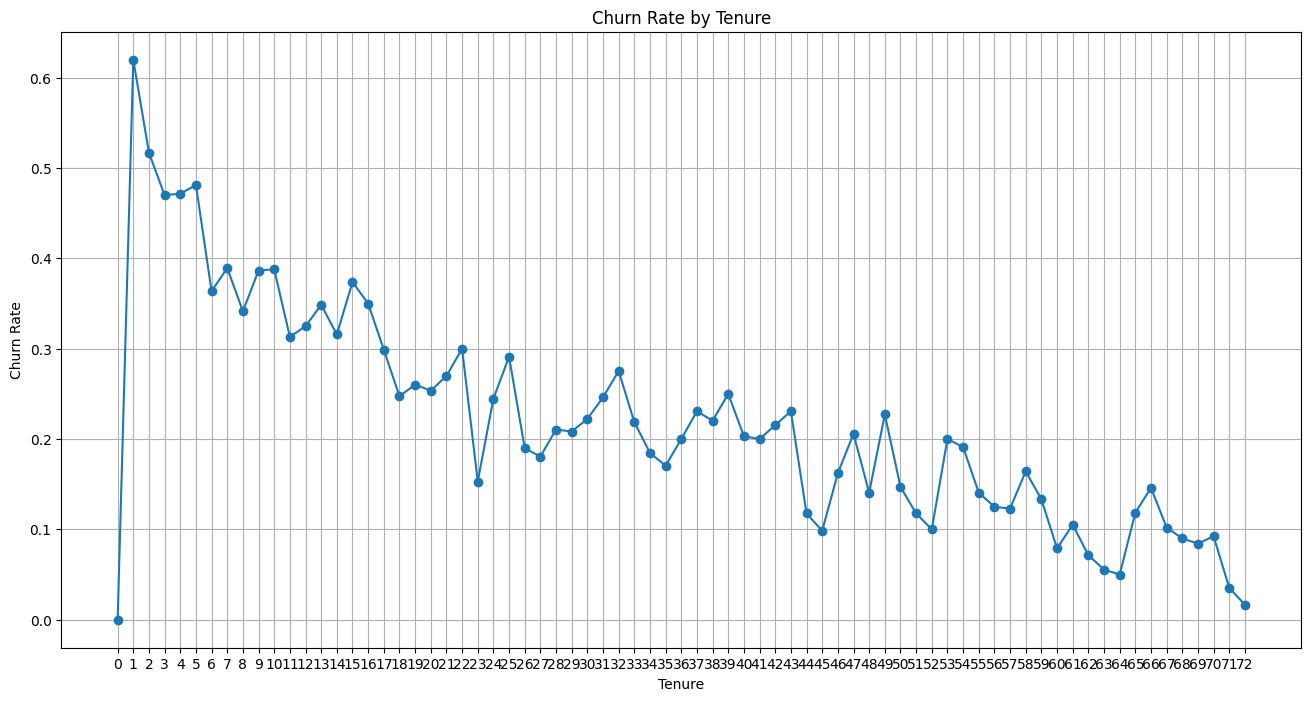

In [ ]:
tenure_counts = df.groupby(['tenure', 'Churn']).size().unstack(fill_value=0)
tenure_counts['Total'] = tenure_counts['Yes'] + tenure_counts['No']
tenure_counts['Churn_Rate'] = tenure_counts['Yes'] / tenure_counts['Total']

plt.figure(figsize=(16, 8))
plt.plot(tenure_counts.index, tenure_counts['Churn_Rate'], marker='o', linestyle='-')
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Rate')
plt.xticks(ticks=tenure_counts.index)
plt.grid(True)
plt.show()

higher the tenure, the lesser the churn rate

Phone service & Multiple lines

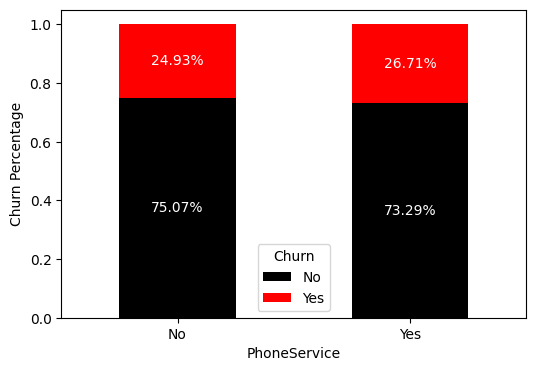

In [ ]:
stacked_plot(df, "PhoneService", "Churn")

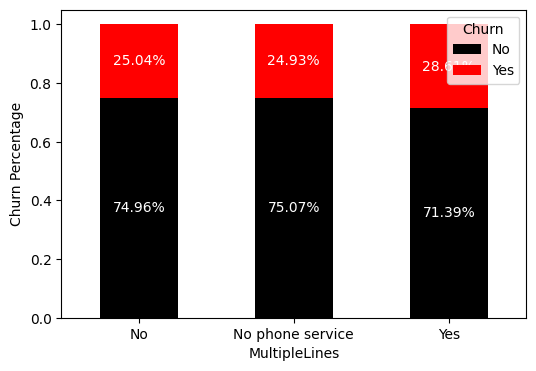

In [ ]:
stacked_plot(df, "MultipleLines", "Churn")

multiplelines and phoneservice do not add value in the model having similar churn rate.

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

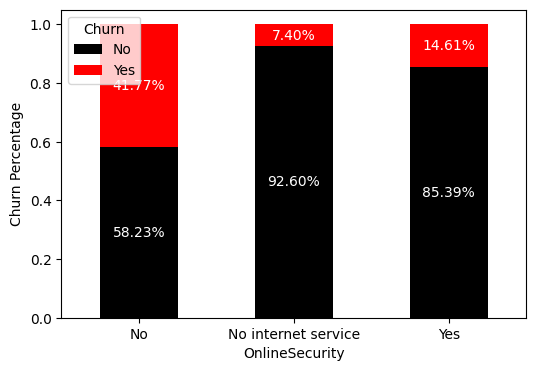

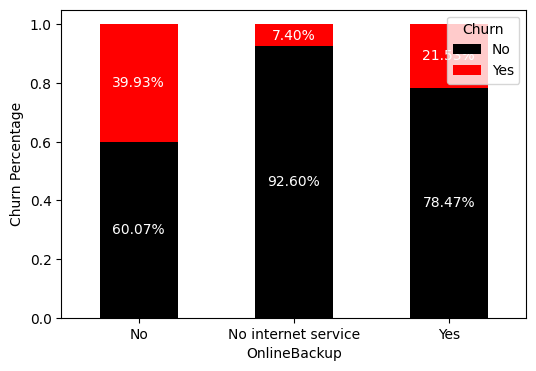

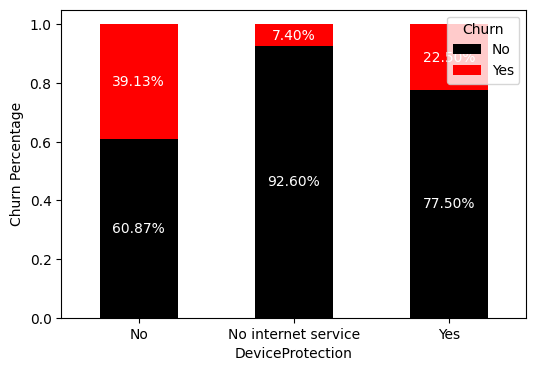

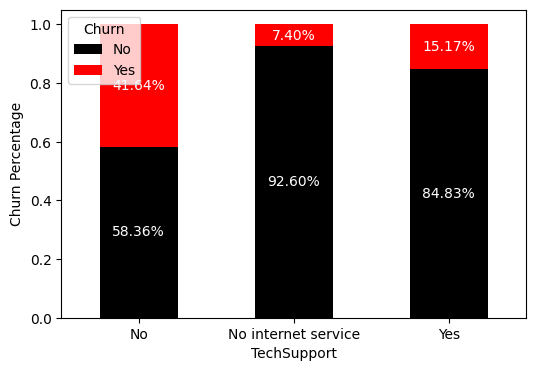

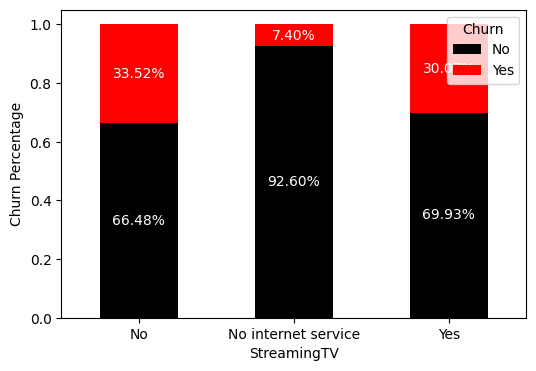

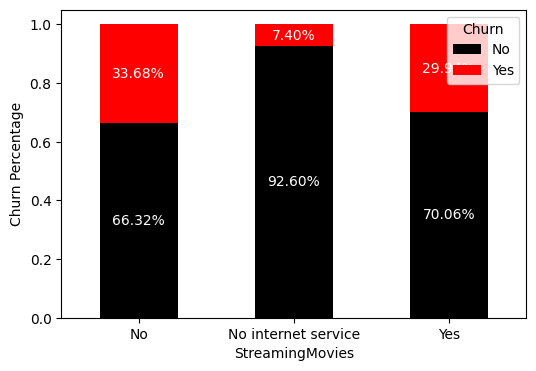

In [ ]:
stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

if a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

<ipython-input-83-4837baa48aae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-83-4837baa48aae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha

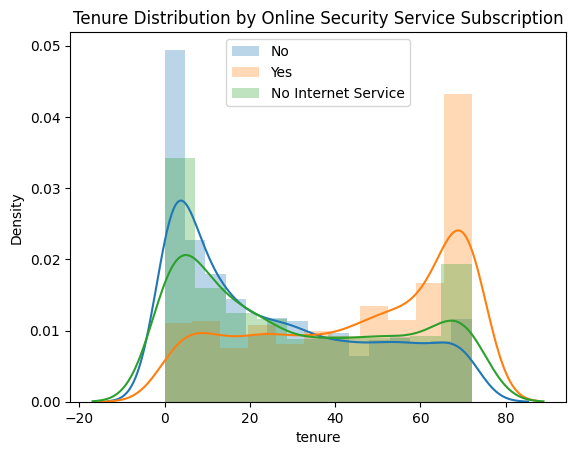

In [ ]:
sns.distplot(df.tenure[df.OnlineSecurity == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.OnlineSecurity == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.OnlineSecurity == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Online Security Service Subscription")
plt.legend()
plt.show()

<ipython-input-84-24a32d87d586>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-84-24a32d87d586>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3),

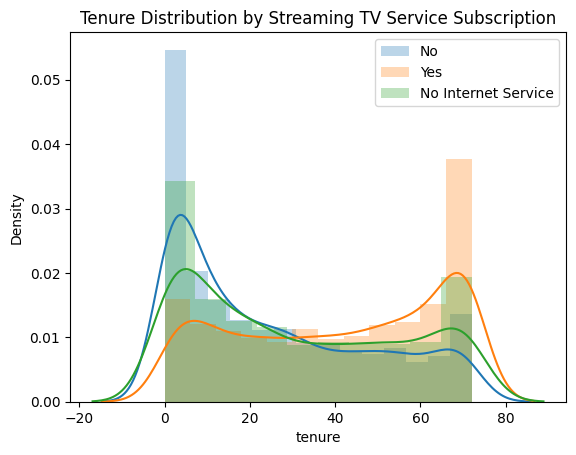

In [ ]:
sns.distplot(df.tenure[df.StreamingTV == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingTV == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingTV == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming TV Service Subscription")
plt.legend()
plt.show()

<ipython-input-85-8016b998fa0c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-85-8016b998fa0c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.StreamingMovies == "Yes"], hist_kws=dict(alp

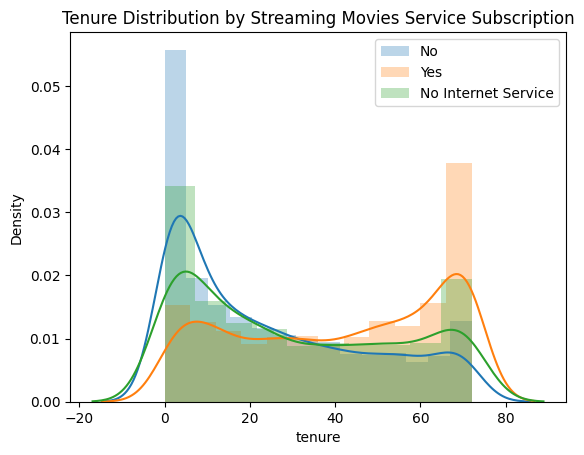

In [ ]:
sns.distplot(df.tenure[df.StreamingMovies == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.StreamingMovies == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
sns.distplot(df.tenure[df.StreamingMovies == "No internet service"], hist_kws=dict(alpha=0.3), label="No Internet Service")
plt.title("Tenure Distribution by Streaming Movies Service Subscription")
plt.legend()
plt.show()

customers are new they do not opt for various services and their churning rate is very high.

InternetService

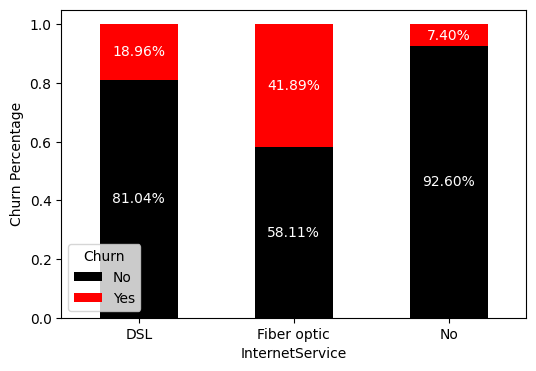

In [ ]:
stacked_plot(df, "InternetService", "Churn")


Fiber Optic, the churn rate is very high. Fiber Optics provides highr speed compared to DSL. The reason might be the higher cost of fiber optics.

Tenure of internet service type

<ipython-input-87-b3e37ad1c29a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-87-b3e37ad1c29a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.InternetService == "DSL"], hist_kws=dict(alp

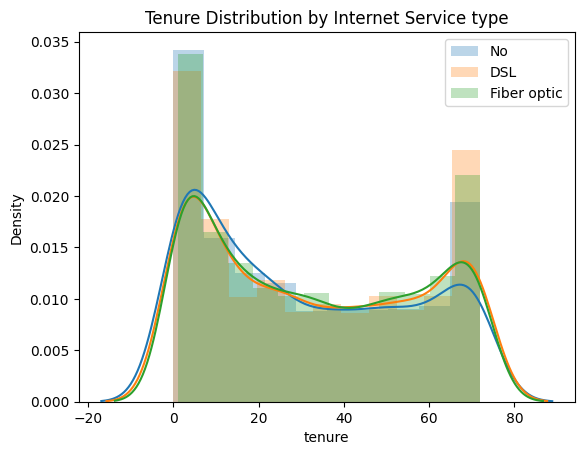

In [ ]:
sns.distplot(df.tenure[df.InternetService == "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.InternetService == "DSL"], hist_kws=dict(alpha=0.3), label="DSL")
sns.distplot(df.tenure[df.InternetService == "Fiber optic"], hist_kws=dict(alpha=0.3), label="Fiber optic")
plt.title("Tenure Distribution by Internet Service type")
plt.legend()
plt.show()

Contracts

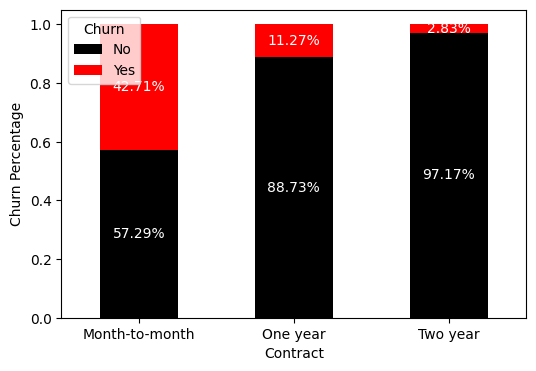

In [ ]:
stacked_plot(df, "Contract", "Churn")

Month-to-month contract Churn rate is very high

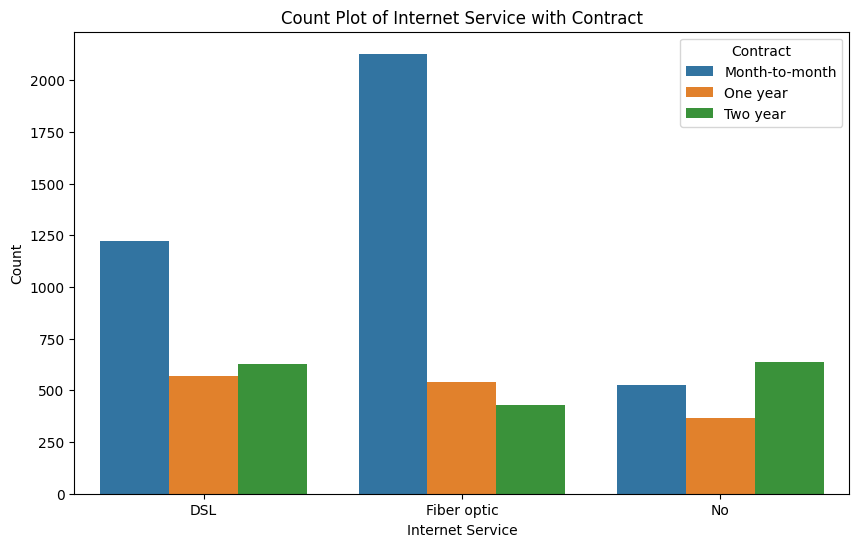

In [ ]:
# Create countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Contract', data=df)
plt.title('Count Plot of Internet Service with Contract')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

Many of the people of who opt for month-to-month Contract choose Fiber optic as Internet service and this is the reason for higher churn rate for fiber optic Internet service type.

PaymentMethod

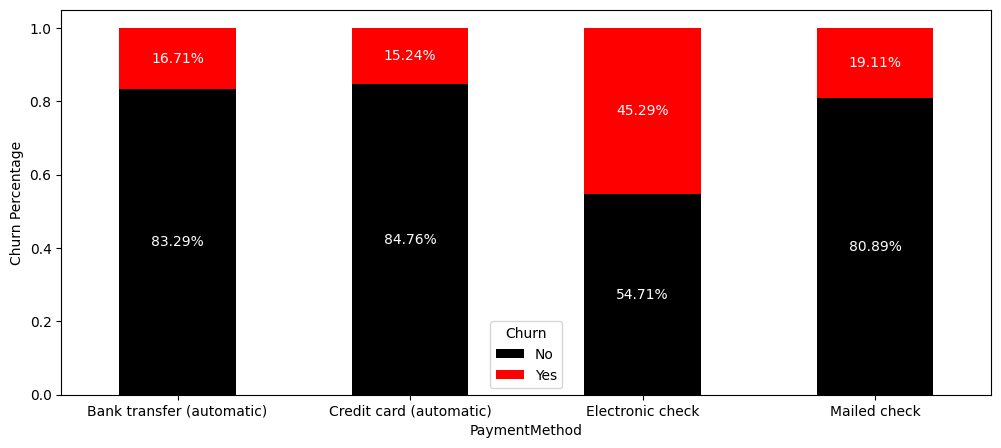

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
temp_df = (df.groupby([group, target]).size() / df.groupby(group)[target].count()).reset_index().pivot(
  columns=target, index=group, values=0)
temp_df.plot(kind='bar', stacked=True, ax=ax, color=["black", "red"])
ax.xaxis.set_tick_params(rotation=0)
ax.set_xlabel(group)
ax.set_ylabel('Churn Percentage')

# Annotate bars with percentage values
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{height:.2%}', (x + width / 2, y + height / 2), ha='center', va='center', color='white')

plt.show()

Electronic check, churn is very high.

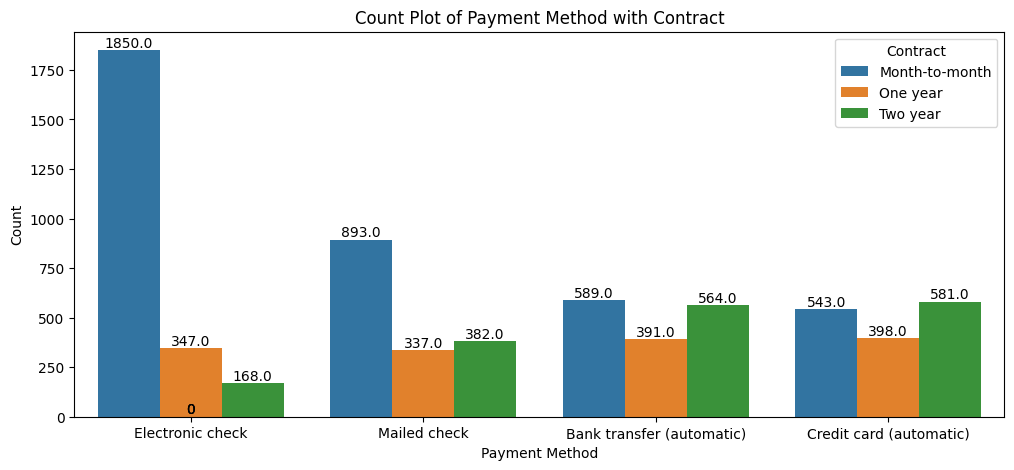

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='PaymentMethod', hue='Contract', data=df, ax=ax)
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')
plt.title('Count Plot of Payment Method with Contract')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

People having month-to-month contract prefer paying by Electronic Check mostly or mailed check. The reason might be short subscription cancellation process compared to automatic payment.

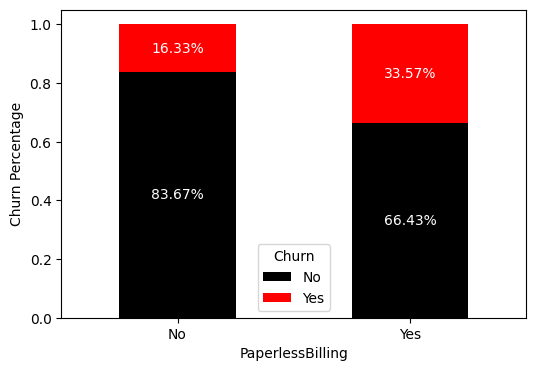

In [ ]:
stacked_plot(df, "PaperlessBilling", "Churn")

TotalCharges

In [ ]:
df['TotalCharges'].isna().sum()

0

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan).astype(float)

Deriving a variable Total charges /tenure which is avg revenue per user (ARPU)

In [ ]:
der = df['TotalCharges']/df['tenure']

In [ ]:
der.describe()

count    7032.000000
mean       64.799424
std        30.185891
min        13.775000
25%        36.179891
50%        70.373239
75%        90.179560
max       121.400000
dtype: float64

In [ ]:
df['rpu'] = round(der,2)

In [ ]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins,rpu
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"[0, 10)",29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,"[30, 40)",55.57
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,"[0, 10)",54.08
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,"[40, 50)",40.91
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,"[0, 10)",75.82


ARPU

In [ ]:
total_revenue = df['MonthlyCharges'].sum()

# Total number of customers
total_customers = len(df)

# Calculate ARPU
arpu = total_revenue / total_customers
print("ARPU:", arpu)

ARPU: 64.76169246059918


LTV

In [ ]:
Avg_tenure=round(df['tenure'].median(),2)

In [ ]:
ltv = arpu * Avg_tenure
print("LTV:", ltv)


LTV: 1878.0890813573762


Monthly CHarges

<ipython-input-141-1c58cc967705>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.Churn== "No"], hist_kws=dict(alpha=0.3), label="No")
<ipython-input-141-1c58cc967705>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.tenure[df.Churn == "Yes"], hist_kws=dict(alpha=0.3), label="Yes

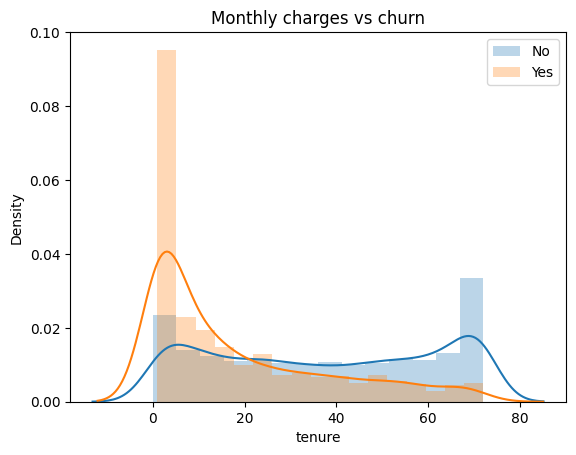

In [ ]:
sns.distplot(df.tenure[df.Churn== "No"], hist_kws=dict(alpha=0.3), label="No")
sns.distplot(df.tenure[df.Churn == "Yes"], hist_kws=dict(alpha=0.3), label="Yes")
plt.title("Monthly charges vs churn")
plt.legend()
plt.show()

The customers paying high monthly fees churn more

In [ ]:
numeric_columns = df.select_dtypes(include=['int', 'float'])
numeric_columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,rpu
0,0,1,29.85,29.85,29.85
1,0,34,56.95,1889.50,55.57
2,0,2,53.85,108.15,54.08
3,0,45,42.30,1840.75,40.91
4,0,2,70.70,151.65,75.82
...,...,...,...,...,...
7038,0,24,84.80,1990.50,82.94
7039,0,72,103.20,7362.90,102.26
7040,0,11,29.60,346.45,31.50
7041,1,4,74.40,306.60,76.65


In [ ]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,rpu
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.217615
tenure,0.016567,1.000000,0.247900,0.825880,0.246198
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.996237
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.650916
rpu,0.217615,0.246198,0.996237,0.650916,1.000000


Data Preprocessing

Importing necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.drop(["customerID"], inplace = True, axis = 1)

df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
df.TotalCharges.fillna(0, inplace = True)
df.TotalCharges = df.TotalCharges.astype(float)

cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
for col in cols1:
  df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols2:
  df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False


In [ ]:
df.isnull().any().any()

False

Train Test Split the data

In [ ]:
X = df.loc[:, df.columns != "Churn"]
y = df["Churn"]
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

MODEL Building

1) Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear')
result = model_lr.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
prediction_test = model_lr.predict(X_test)
# Print the prediction accuracy
lr_Acc = metrics.accuracy_score(y_test, prediction_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8050165641268339


In [ ]:
# To get the weights of all the variables
weights = pd.Series(model_lr.coef_[0],index=X.columns.values)
print(weights.sort_values(ascending = False)[:10].plot(kind='bar', color='green'))

Axes(0.125,0.11;0.775x0.77)


In [ ]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color='red'))

Axes(0.125,0.11;0.775x0.77)


2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
rf_Acc = metrics.accuracy_score(y_test, prediction_test)
print (metrics.accuracy_score(y_test, prediction_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.808329389493611


In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

<Axes: >

3) SVM

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_train,y_train)
preds = model_svm.predict(X_test)
svm_Acc = metrics.accuracy_score(y_test, preds)
svm_Acc

0.8021769995267393

In [ ]:
weights = pd.Series(model_svm.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color='green'))

Axes(0.125,0.11;0.775x0.77)



4) ADA Boost


In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(algorithm='SAMME.R')
# n_estimators = 50 (default value)
# base_estimator = DecisionTreeClassifier (default value)
model_ada.fit(X_train,y_train)
preds = model_ada.predict(X_test)
ada_Acc = metrics.accuracy_score(y_test, preds)
ada_Acc

0.7979176526265973

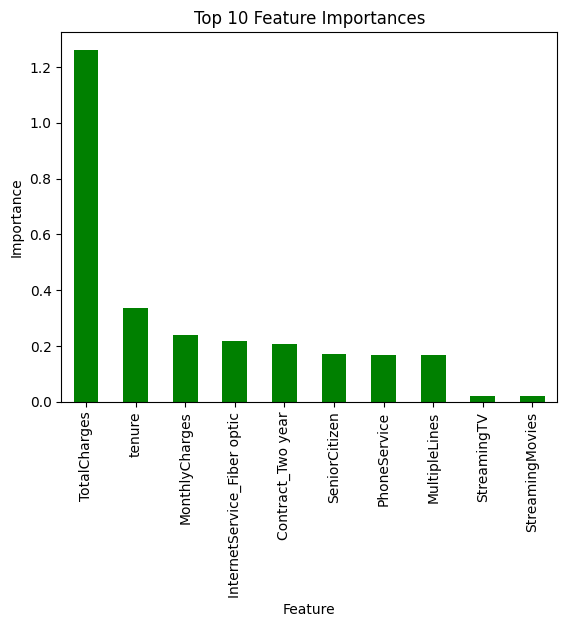

In [ ]:
feature_importances = np.mean([tree.feature_importances_ for tree in model_ada.estimators_], axis=0)
importances_series = pd.Series(feature_importances, index=X.columns)
importances_series.nlargest(10).plot(kind='bar', color='green')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

XG Boost

In [ ]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
preds = model_xg.predict(X_test)
xg_Acc = metrics.accuracy_score(y_test, preds)
xg_Acc

0.783719829626124

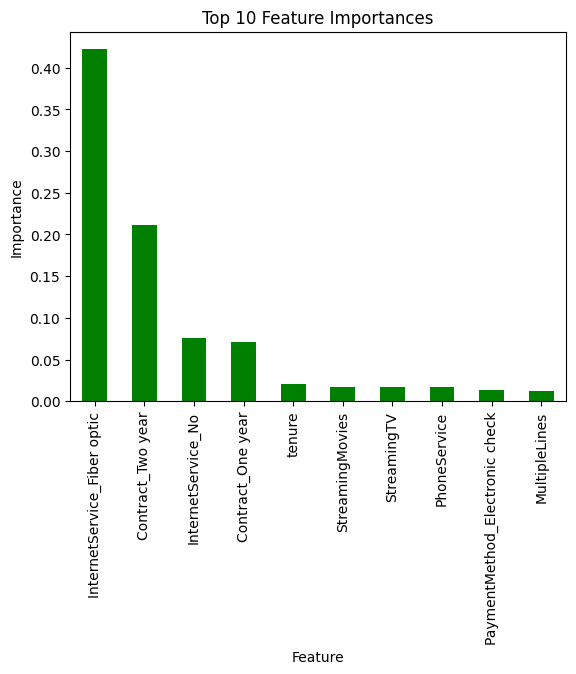

In [ ]:
feature_importances = model_xg.feature_importances_
importances_series = pd.Series(feature_importances, index=X.columns)
importances_series.nlargest(10).plot(kind='bar', color='green')
plt.title('Top 10 Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

Visual

In [ ]:
!pip install shap

In [ ]:
import shap
shap.initjs()

import joblib

In [ ]:
explainer = shap.TreeExplainer(model_rf)

shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap_values = shap_values.T  # Transpose to match (2, 23) shape

# Generate the SHAP force plot
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

In [ ]:
# Saving Explainer
ex_filename = 'explainer.bz2'
joblib.dump(explainer, filename=ex_filename, compress=('bz2', 9))

['explainer.bz2']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Train multiple models
models = [model_lr, model_svm, model_rf, model_ada, model_xg]  # Replace with your models

# Evaluate each model using cross-validation
cv_results_acc = []
cv_results_auc = []
model_names = []

for model in models:
    # Compute accuracy scores
    cv_scores_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results_acc.append(cv_scores_acc)

    # Compute ROC AUC scores
    y_pred_proba = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    cv_scores_auc = roc_auc_score(y_train, y_pred_proba)
    cv_results_auc.append(cv_scores_auc)

    model_names.append(type(model).__name__)

# Plot the validation metrics for different models
plt.figure(figsize=(12, 6))

# Boxplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(cv_results_acc, labels=model_names)
plt.title('Validation Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Boxplot for ROC AUC
plt.subplot(1, 2, 2)
plt.plot(cv_results_auc, labels=model_names)
plt.title('Validation ROC AUC of Different Models')
plt.xlabel('Model')
plt.ylabel('ROC AUC')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

AttributeError: Line2D.set() got an unexpected keyword argument 'labels'

In [ ]:
cv_results_auc

[0.8425755389469513,
 0.8330930533468145,
 0.8440095976506333,
 0.8421395419141444,
 0.8203494284935228]

In [ ]:
model_names

['LogisticRegression',
 'SVC',
 'RandomForestClassifier',
 'AdaBoostClassifier',
 'XGBClassifier']

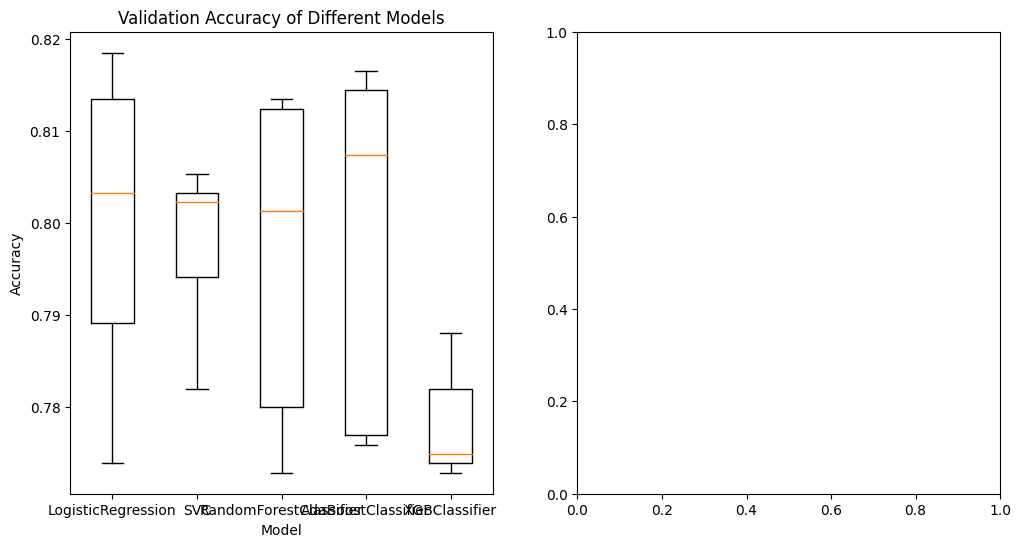

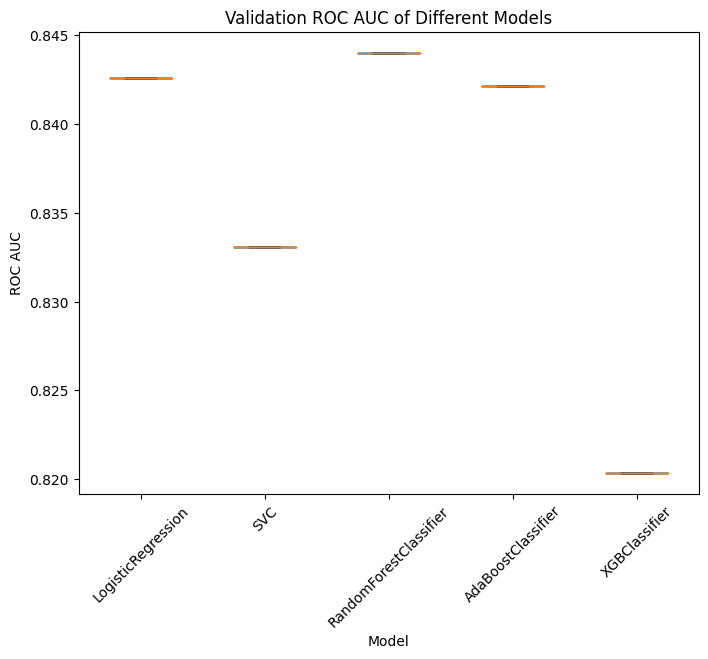

In [ ]:
cv_results_auc_lists = [[score] * 5 for score in cv_results_auc]  # Assuming 5-fold cross-validation

# Plot the validation ROC AUC for different models
plt.figure(figsize=(8, 6))
plt.boxplot(cv_results_auc_lists, labels=model_names)
plt.title('Validation ROC AUC of Different Models')
plt.xlabel('Model')
plt.ylabel('ROC AUC')
plt.xticks(rotation=45)
plt.show()

In [ ]:
models=dict()
models={"Logistic Regression":{"ROC":roc_auc_score(y_test, model_lr.predict(X_test)),
                              "Recall":recall_score(y_test, model_lr.predict(X_test)),
                              "Accuracy":lr_Acc},
       "SVM":{"ROC":roc_auc_score(y_test, model_svm.predict(X_test)),
             "Recall":recall_score(y_test, model_svm.predict(X_test)),
             "Accuracy":svm_Acc},
       "Random Forest":{"ROC":roc_auc_score(y_test, model_rf.predict(X_test)),
                       "Recall":recall_score(y_test, model_rf.predict(X_test)),
                       "Accuracy":rf_Acc},
        "Ada Boost":{"ROC":roc_auc_score(y_test, model_ada.predict(X_test)),
                       "Recall":recall_score(y_test, model_ada.predict(X_test)),
                       "Accuracy":ada_Acc},
        "XG Boost":{"ROC":roc_auc_score(y_test, model_xg.predict(X_test)),
                       "Recall":recall_score(y_test, model_xg.predict(X_test)),
                       "Accuracy":xg_Acc}}

In [ ]:
models_df=pd.DataFrame(models)
models_df=models_df.T
models_df

In [ ]:
from matplotlib.patches import Circle, Wedge, Rectangle

def degree_range(n):
    start = np.linspace(0,180,n+1, endpoint=True)[0:-1]
    end = np.linspace(0,180,n+1, endpoint=True)[1::]
    mid_points = start + ((end-start)/2.)
    return np.c_[start, end], mid_points

def rot_text(ang):
    rotation = np.degrees(np.radians(ang) * np.pi / np.pi - np.radians(90))
    return rotation

def gauge(labels=['LOW','MEDIUM','HIGH','EXTREME'], \
          colors=['#007A00','#0063BF','#FFCC00','#ED1C24'], Probability=1, fname=False):

    N = len(labels)
    colors = colors[::-1]

    """
    begins the plotting
    """

    fig, ax = plt.subplots()

    ang_range, mid_points = degree_range(4)

    labels = labels[::-1]

    """
    plots the sectors and the arcs
    """
    patches = []
    for ang, c in zip(ang_range, colors):
        # sectors
        patches.append(Wedge((0.,0.), .4, *ang, facecolor='w', lw=2))
        # arcs
        patches.append(Wedge((0.,0.), .4, *ang, width=0.10, facecolor=c, lw=2, alpha=0.5))

    [ax.add_patch(p) for p in patches]


    """
    set the labels (e.g. 'LOW','MEDIUM',...)
    """

    for mid, lab in zip(mid_points, labels):

        ax.text(0.35 * np.cos(np.radians(mid)), 0.35 * np.sin(np.radians(mid)), lab, \
            horizontalalignment='center', verticalalignment='center', fontsize=14, \
            fontweight='bold', rotation = rot_text(mid))

    """
    set the bottom banner and the title
    """
    r = Rectangle((-0.4,-0.1),0.8,0.1, facecolor='w', lw=2)
    ax.add_patch(r)

    ax.text(0, -0.05, 'Churn Probability ' + np.round(Probability,2).astype(str), horizontalalignment='center', \
         verticalalignment='center', fontsize=22, fontweight='bold')

    """
    plots the arrow now
    """

    pos = (1-Probability)*180
    ax.arrow(0, 0, 0.225 * np.cos(np.radians(pos)), 0.225 * np.sin(np.radians(pos)), \
                 width=0.04, head_width=0.09, head_length=0.1, fc='k', ec='k')

    ax.add_patch(Circle((0, 0), radius=0.02, facecolor='k'))
    ax.add_patch(Circle((0, 0), radius=0.01, facecolor='w', zorder=11))

    """
    removes frame and ticks, and makes axis equal and tight
    """

    ax.set_frame_on(False)
    ax.axes.set_xticks([])
    ax.axes.set_yticks([])
    ax.axis('equal')
    plt.tight_layout()
    if fname:
        fig.savefig(fname, dpi=200)

In [ ]:
gauge(Probability=model_xg.predict_proba(X_test.iloc[0:1])[0,1])

In [ ]:
X_test.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

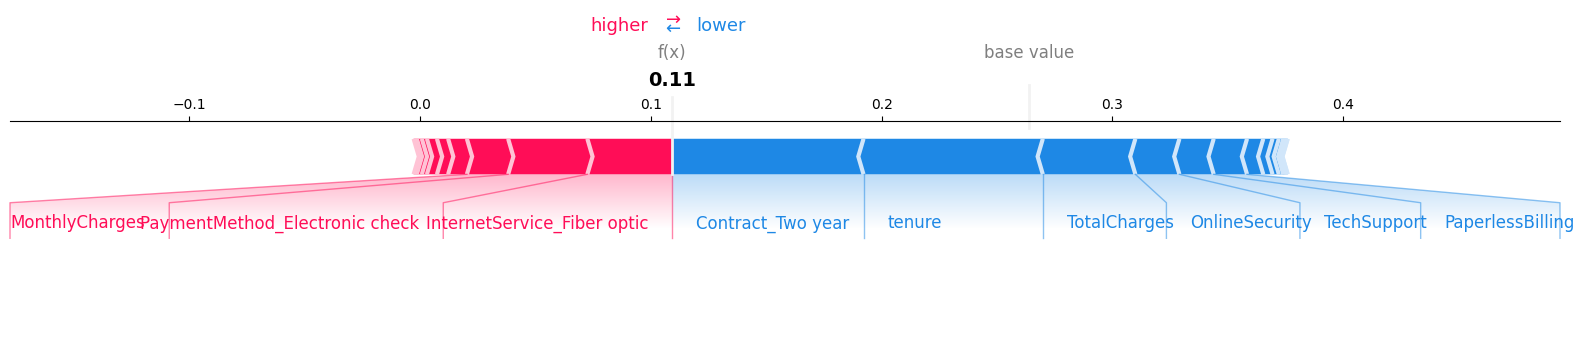

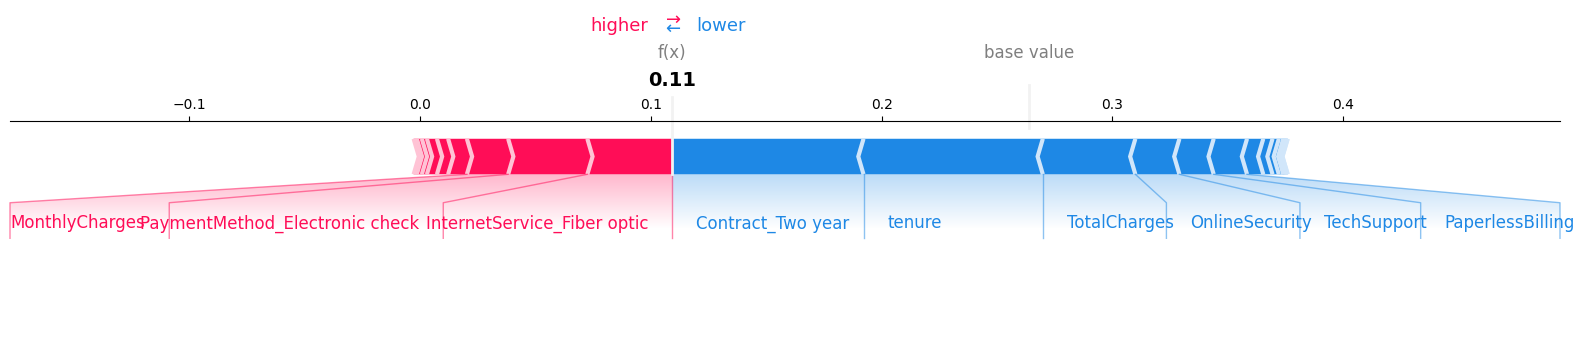

AttributeError: 'NoneType' object has no attribute 'savefig'

In [ ]:
explainer = joblib.load(filename="explainer.bz2")
shap_values = explainer.shap_values(np.array(X_test.iloc[0]))
shap_values = shap_values.T

# Generate the SHAP force plot
shap.force_plot(explainer.expected_value[1], shap_values[1], list(X_test.columns), matplotlib=True, show=True).savefig('shap.png', bbox_inches="tight")